# **ANIKET NANDY 015015 Q2 REGRESSION**

In [ ]:
#Create spark session
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("local[*]").getOrCreate()

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StringIndexer
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [ ]:
#Import the dataset
dataset = spark.read.csv("insurance.csv",inferSchema=True,header=True)
dataset.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- bmi: double (nullable = true)
 |-- children: integer (nullable = true)
 |-- smoker: string (nullable = true)
 |-- region: string (nullable = true)
 |-- charges: double (nullable = true)



In [ ]:
#showing top 10 rows
dataset.show(10)

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
| 31|female| 25.74|       0|    no|southeast|  3756.6216|
| 46|female| 33.44|       1|    no|southeast|  8240.5896|
| 37|female| 27.74|       3|    no|northwest|  7281.5056|
| 37|  male| 29.83|       2|    no|northeast|  6406.4107|
| 60|female| 25.84|       0|    no|northwest|28923.13692|
+---+------+------+--------+------+---------+-----------+
only showing top 10 rows



In [ ]:
#showing the columns
dataset.columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

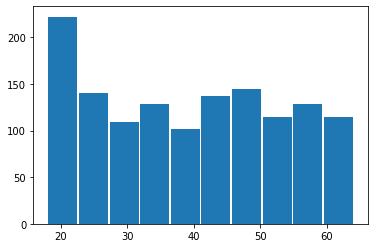

In [ ]:
#Plot: age 
import matplotlib.pyplot as plt 

x1 = dataset.toPandas()["age"].values
plt.hist(x1,rwidth=0.95)

(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <a list of 10 Patch objects>)

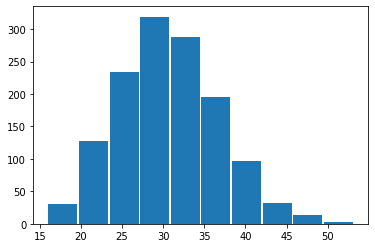

In [ ]:
#Plot: bmi
x2 = dataset.toPandas()["bmi"].values
plt.hist(x2, rwidth=0.95)

(array([325.,   0.,   0., 364.,   0.,   0., 325.,   0.,   0., 324.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

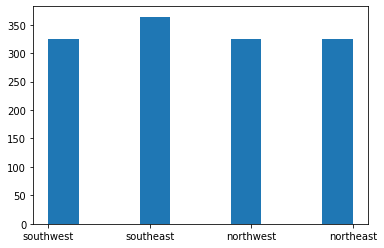

In [ ]:
#Plot: region
x3 = dataset.toPandas()["region"].values
plt.hist(x3)

(array([574.,   0., 324.,   0., 240.,   0., 157.,   0.,  25.,  18.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

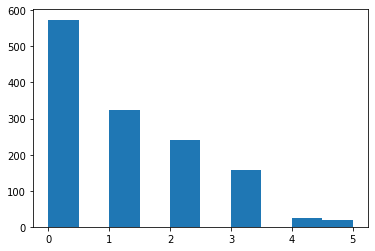

In [ ]:
#Plot: Children
x4 = dataset.toPandas()["children"].values
plt.hist(x4)

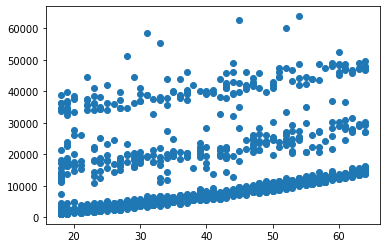

In [ ]:
#Get idea about the relationship of age and charges
x5 = dataset.toPandas()["charges"].values
plt.scatter(x1,x5)

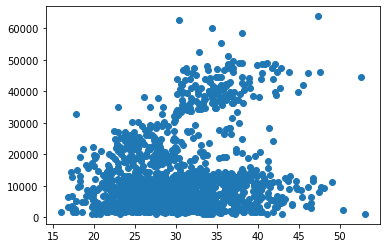

In [ ]:
#bmi vs charges
plt.scatter(x2,x5)

In [ ]:
#Transform String to Index
indexer = StringIndexer(inputCols=["sex","smoker","region"], outputCols=["sexIndex","smokerIndex","regionIndex"])
dataset_indexed = indexer.fit(dataset).transform(dataset)
dataset_indexed.show()

+---+------+------+--------+------+---------+-----------+--------+-----------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|sexIndex|smokerIndex|regionIndex|
+---+------+------+--------+------+---------+-----------+--------+-----------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|     1.0|        1.0|        2.0|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|     0.0|        0.0|        0.0|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|     0.0|        0.0|        0.0|
| 33|  male|22.705|       0|    no|northwest|21984.47061|     0.0|        0.0|        1.0|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|     0.0|        0.0|        1.0|
| 31|female| 25.74|       0|    no|southeast|  3756.6216|     1.0|        0.0|        0.0|
| 46|female| 33.44|       1|    no|southeast|  8240.5896|     1.0|        0.0|        0.0|
| 37|female| 27.74|       3|    no|northwest|  7281.5056|     1.0|        0.0|        1.0|

In [ ]:
#Group the features together
feature_assembler = VectorAssembler(inputCols=["age","sexIndex","bmi","children","smokerIndex","regionIndex"], outputCol="independent_features")
output = feature_assembler.transform(dataset_indexed)
output.show()

+---+------+------+--------+------+---------+-----------+--------+-----------+-----------+--------------------+
|age|   sex|   bmi|children|smoker|   region|    charges|sexIndex|smokerIndex|regionIndex|independent_features|
+---+------+------+--------+------+---------+-----------+--------+-----------+-----------+--------------------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|     1.0|        1.0|        2.0|[19.0,1.0,27.9,0....|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|     0.0|        0.0|        0.0|[18.0,0.0,33.77,1...|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|     0.0|        0.0|        0.0|[28.0,0.0,33.0,3....|
| 33|  male|22.705|       0|    no|northwest|21984.47061|     0.0|        0.0|        1.0|[33.0,0.0,22.705,...|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|     0.0|        0.0|        1.0|[32.0,0.0,28.88,0...|
| 31|female| 25.74|       0|    no|southeast|  3756.6216|     1.0|        0.0|        0.0|[31.0,1.0,25.7

In [ ]:
finalized_data = output.select("independent_features","charges")
finalized_data.show()

+--------------------+-----------+
|independent_features|    charges|
+--------------------+-----------+
|[19.0,1.0,27.9,0....|  16884.924|
|[18.0,0.0,33.77,1...|  1725.5523|
|[28.0,0.0,33.0,3....|   4449.462|
|[33.0,0.0,22.705,...|21984.47061|
|[32.0,0.0,28.88,0...|  3866.8552|
|[31.0,1.0,25.74,0...|  3756.6216|
|[46.0,1.0,33.44,1...|  8240.5896|
|[37.0,1.0,27.74,3...|  7281.5056|
|[37.0,0.0,29.83,2...|  6406.4107|
|[60.0,1.0,25.84,0...|28923.13692|
|[25.0,0.0,26.22,0...|  2721.3208|
|[62.0,1.0,26.29,0...| 27808.7251|
|[23.0,0.0,34.4,0....|   1826.843|
|[56.0,1.0,39.82,0...| 11090.7178|
|[27.0,0.0,42.13,0...| 39611.7577|
|[19.0,0.0,24.6,1....|   1837.237|
|[52.0,1.0,30.78,1...| 10797.3362|
|[23.0,0.0,23.845,...| 2395.17155|
|[56.0,0.0,40.3,0....|  10602.385|
|[30.0,0.0,35.3,0....|  36837.467|
+--------------------+-----------+
only showing top 20 rows



In [ ]:
#Define the model and train
train_data, test_data = finalized_data.randomSplit([0.75,0.25])
regressor = LinearRegression(featuresCol="independent_features", labelCol="charges")
regressor = regressor.fit(train_data)

In [ ]:
#Predictions
pred_results = regressor.evaluate(test_data)
print("MEAN ABSOLUTE ERROR: ", pred_results.meanAbsoluteError)
print("MEAN SQUARED ERROR: ", pred_results.meanSquaredError)
print("RMSE: ", pred_results.rootMeanSquaredError)

MEAN ABSOLUTE ERROR:  4366.789658893621
MEAN SQUARED ERROR:  40254860.6523777
RMSE:  6344.671831732332
